# 1. Download the LaTeX project

In [1]:
import os
os.chdir('..')

# 3. Compile LaTeX project to Extract Original Colors

We can get the original compiled PDF file.

/tmp/ipykernel_319313/263058916.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(td)


実行コマンド: /root/perl5/perlbrew/perls/perl-5.22.4/bin/perl /TeX/texannotate/texcompile/service/run_autotex.pl /tmp/tmp1n0eot2f /usr/local/texlive/2025 /usr/local/texlive/2025/bin/x86_64-linux
コンパイル成功: cratercnn.pdf (1081270 bytes)


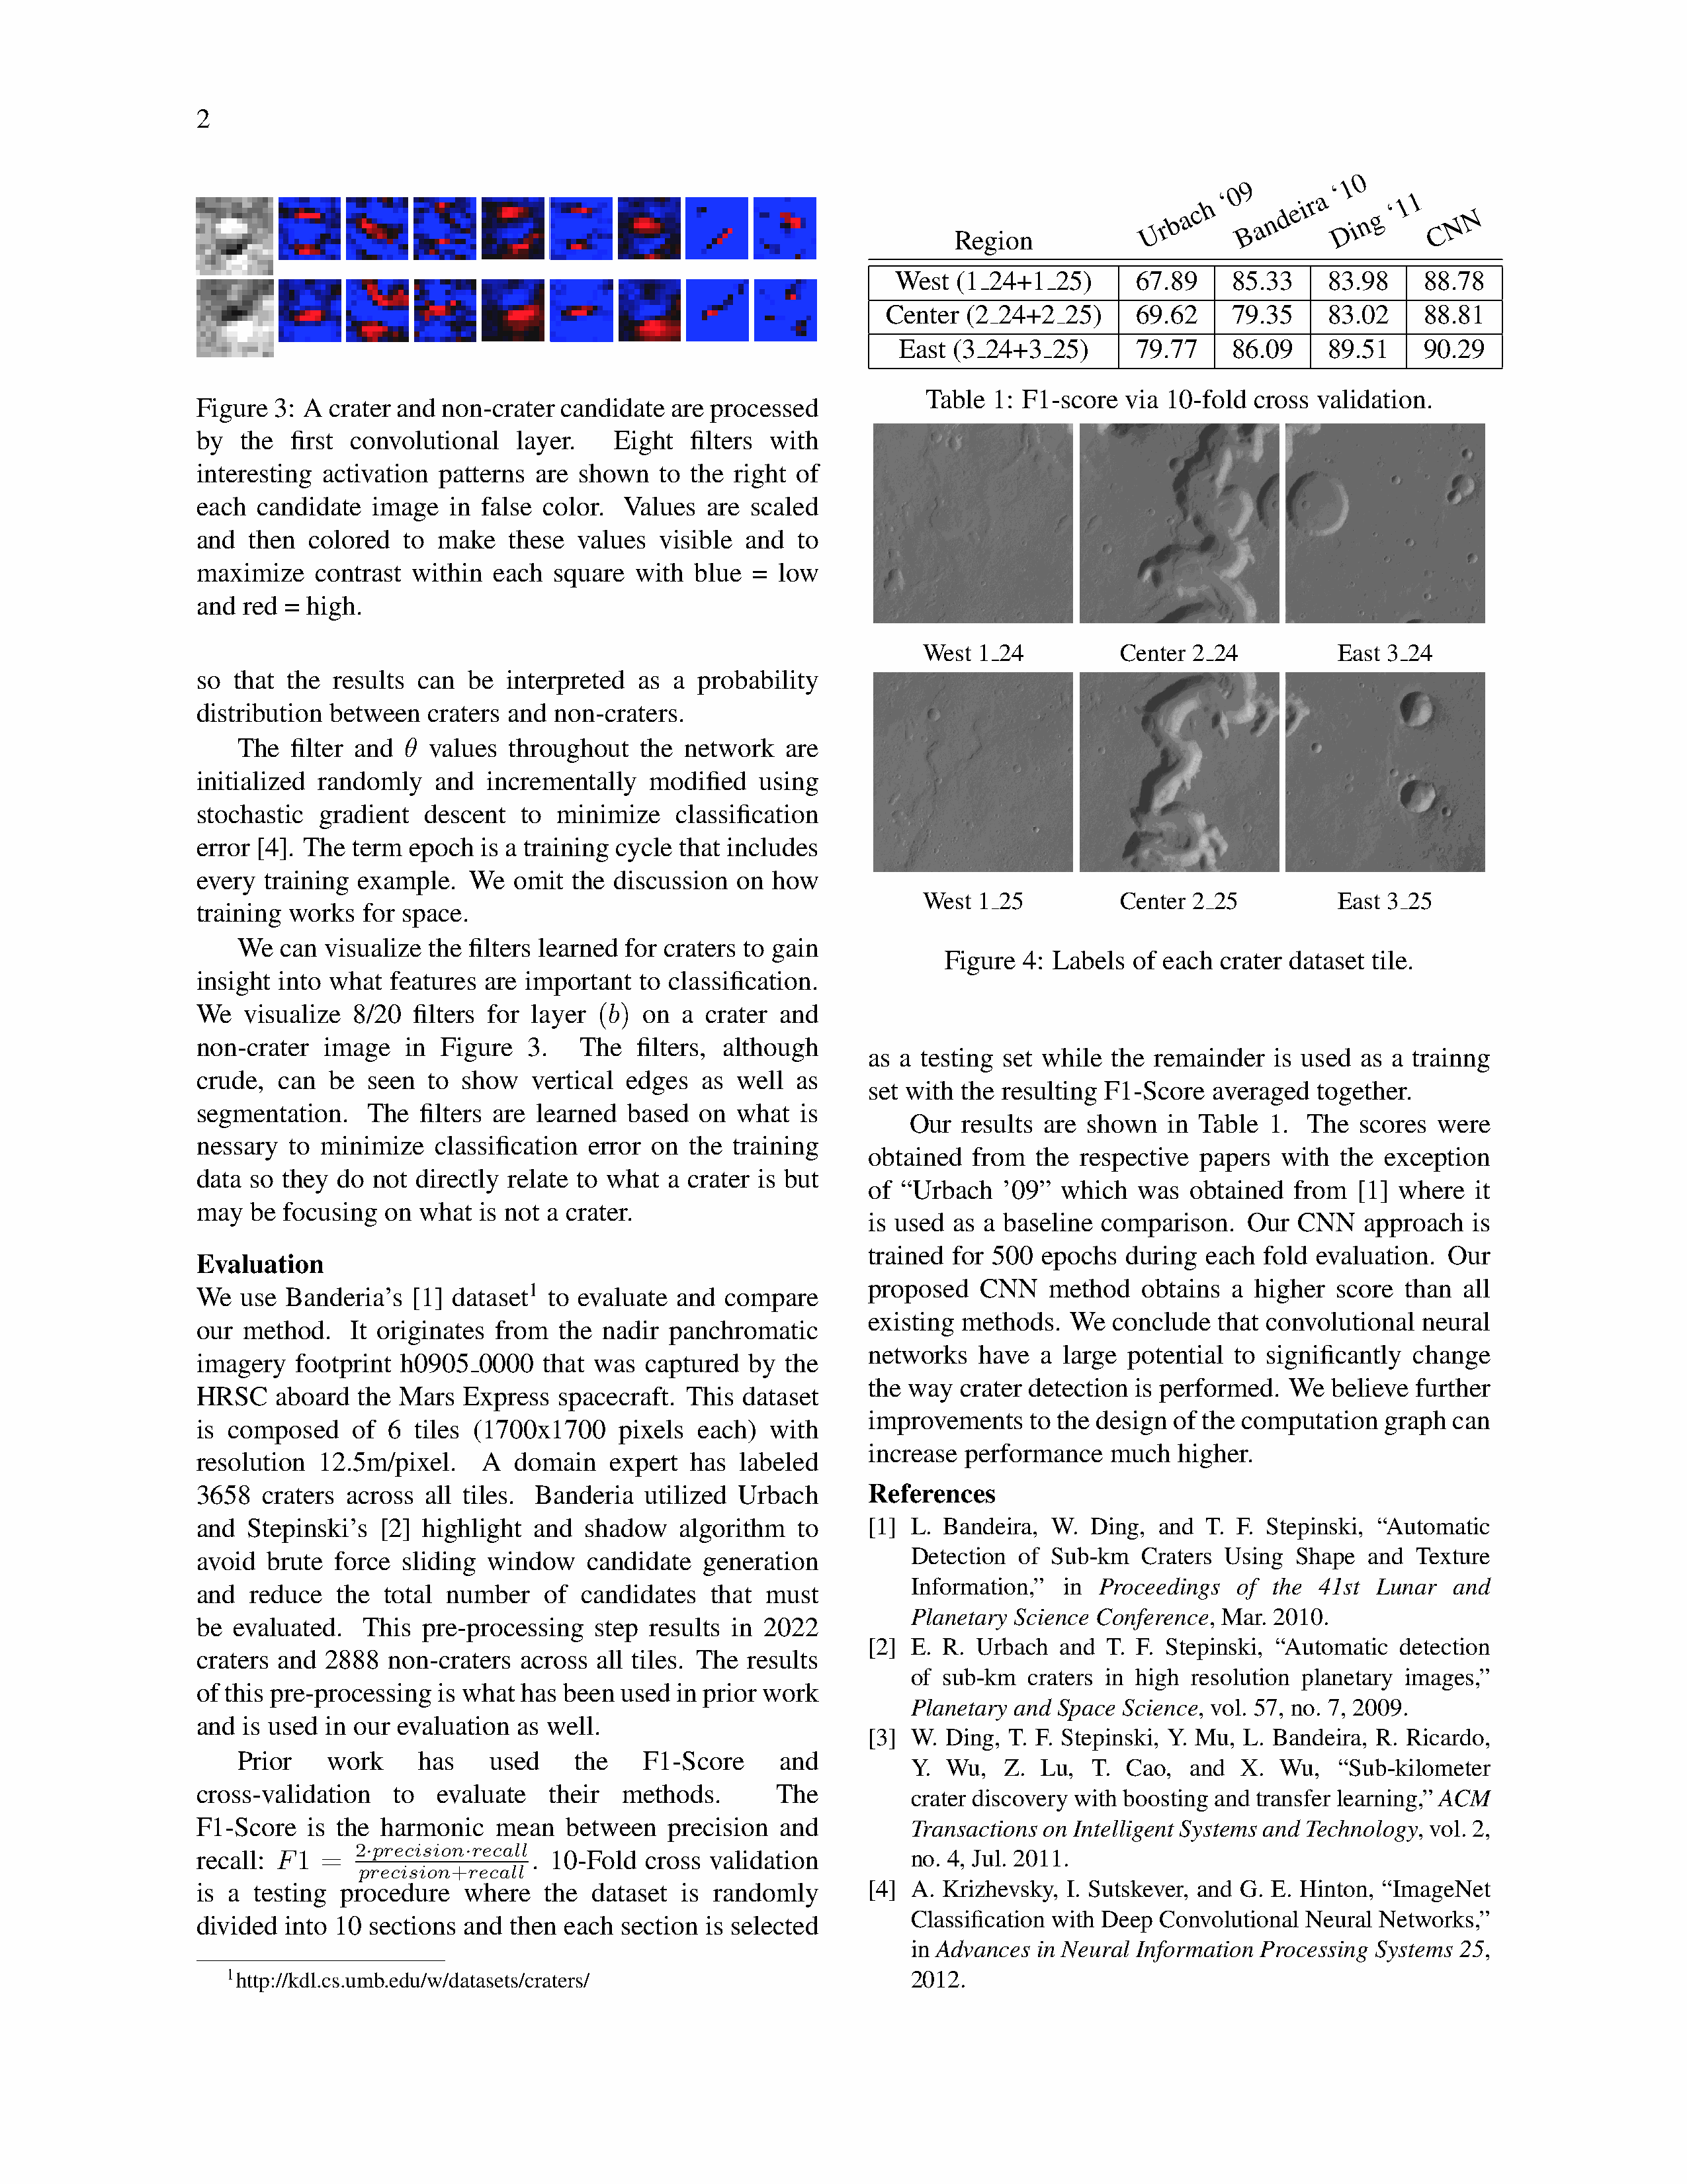

In [2]:
from utils.utils import (find_free_port, find_latex_file, postprocess_latex,
                  preprocess_latex, tup2str)
from texcompile.client import compile_pdf_locally
import tarfile
from pdfextract.pdf_extract import pdf_extract
from texannotate.color_annotation import ColorAnnotation
import pdfplumber
import tempfile

with tempfile.TemporaryDirectory() as td:
    with tarfile.open('/TeX/texannotate/downloaded/1601.00978.tar.gz' ,'r:gz') as tar:
        tar.extractall(td)
        preprocess_latex(td)

    basename, pdf_bytes = compile_pdf_locally(
        sources_dir=td
    ) # compile the unmodified latex firstly
    shapes, tokens = pdf_extract(pdf_bytes)
    color_dict = ColorAnnotation()
    for rect in shapes:
        color_dict.add_existing_color(tup2str(rect['stroking_color']))
    for token in tokens:
        color_dict.add_existing_color(token['color'])

with pdfplumber.open(pdf_bytes) as doc:
    p0 = doc.pages[1]
    im_origin = p0.to_image(resolution=300)
im_origin

# 4. Annotate the LaTeX project and Compile

Here we can get gradient color tokens and figures with different background colors.

/tmp/ipykernel_319313/2163950210.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(td)


start annotating: /tmp/tmpp70nhmpv/cratercnn.tex
{'name': 'align'}
{'name': 'align*'}
{'name': 'alignat', 'arg': {'format': '[]{}', 'snippet': '[${2:alignment}]{${1:ncols}}'}}
{'name': 'alignat*', 'arg': {'format': '[]{}', 'snippet': '[${2:alignment}]{${1:ncols}}'}}
{'name': 'alignat', 'arg': {'format': '{}', 'snippet': '{${1:ncols}}'}}
{'name': 'alignat*', 'arg': {'format': '{}', 'snippet': '{${1:ncols}}'}}
{'name': 'aligned'}
{'name': 'aligned', 'arg': {'format': '[]', 'snippet': '[${1:alignment}]'}}
{'name': 'alignedat', 'arg': {'format': '{}', 'snippet': '{${1:ncols}}'}}
{'name': 'bmatrix'}
{'name': 'Bmatrix'}
{'name': 'cases'}
{'name': 'equation*'}
{'name': 'flalign'}
{'name': 'flalign*'}
{'name': 'gather'}
{'name': 'gather*'}
{'name': 'gathered'}
{'name': 'gathered', 'arg': {'format': '[]', 'snippet': '[${1:alignment}]'}}
{'name': 'matrix'}
{'name': 'multline'}
{'name': 'multline*'}
{'name': 'pmatrix'}
{'name': 'smallmatrix'}
{'name': 'split'}
{'name': 'subarray'}
{'name': 'subar

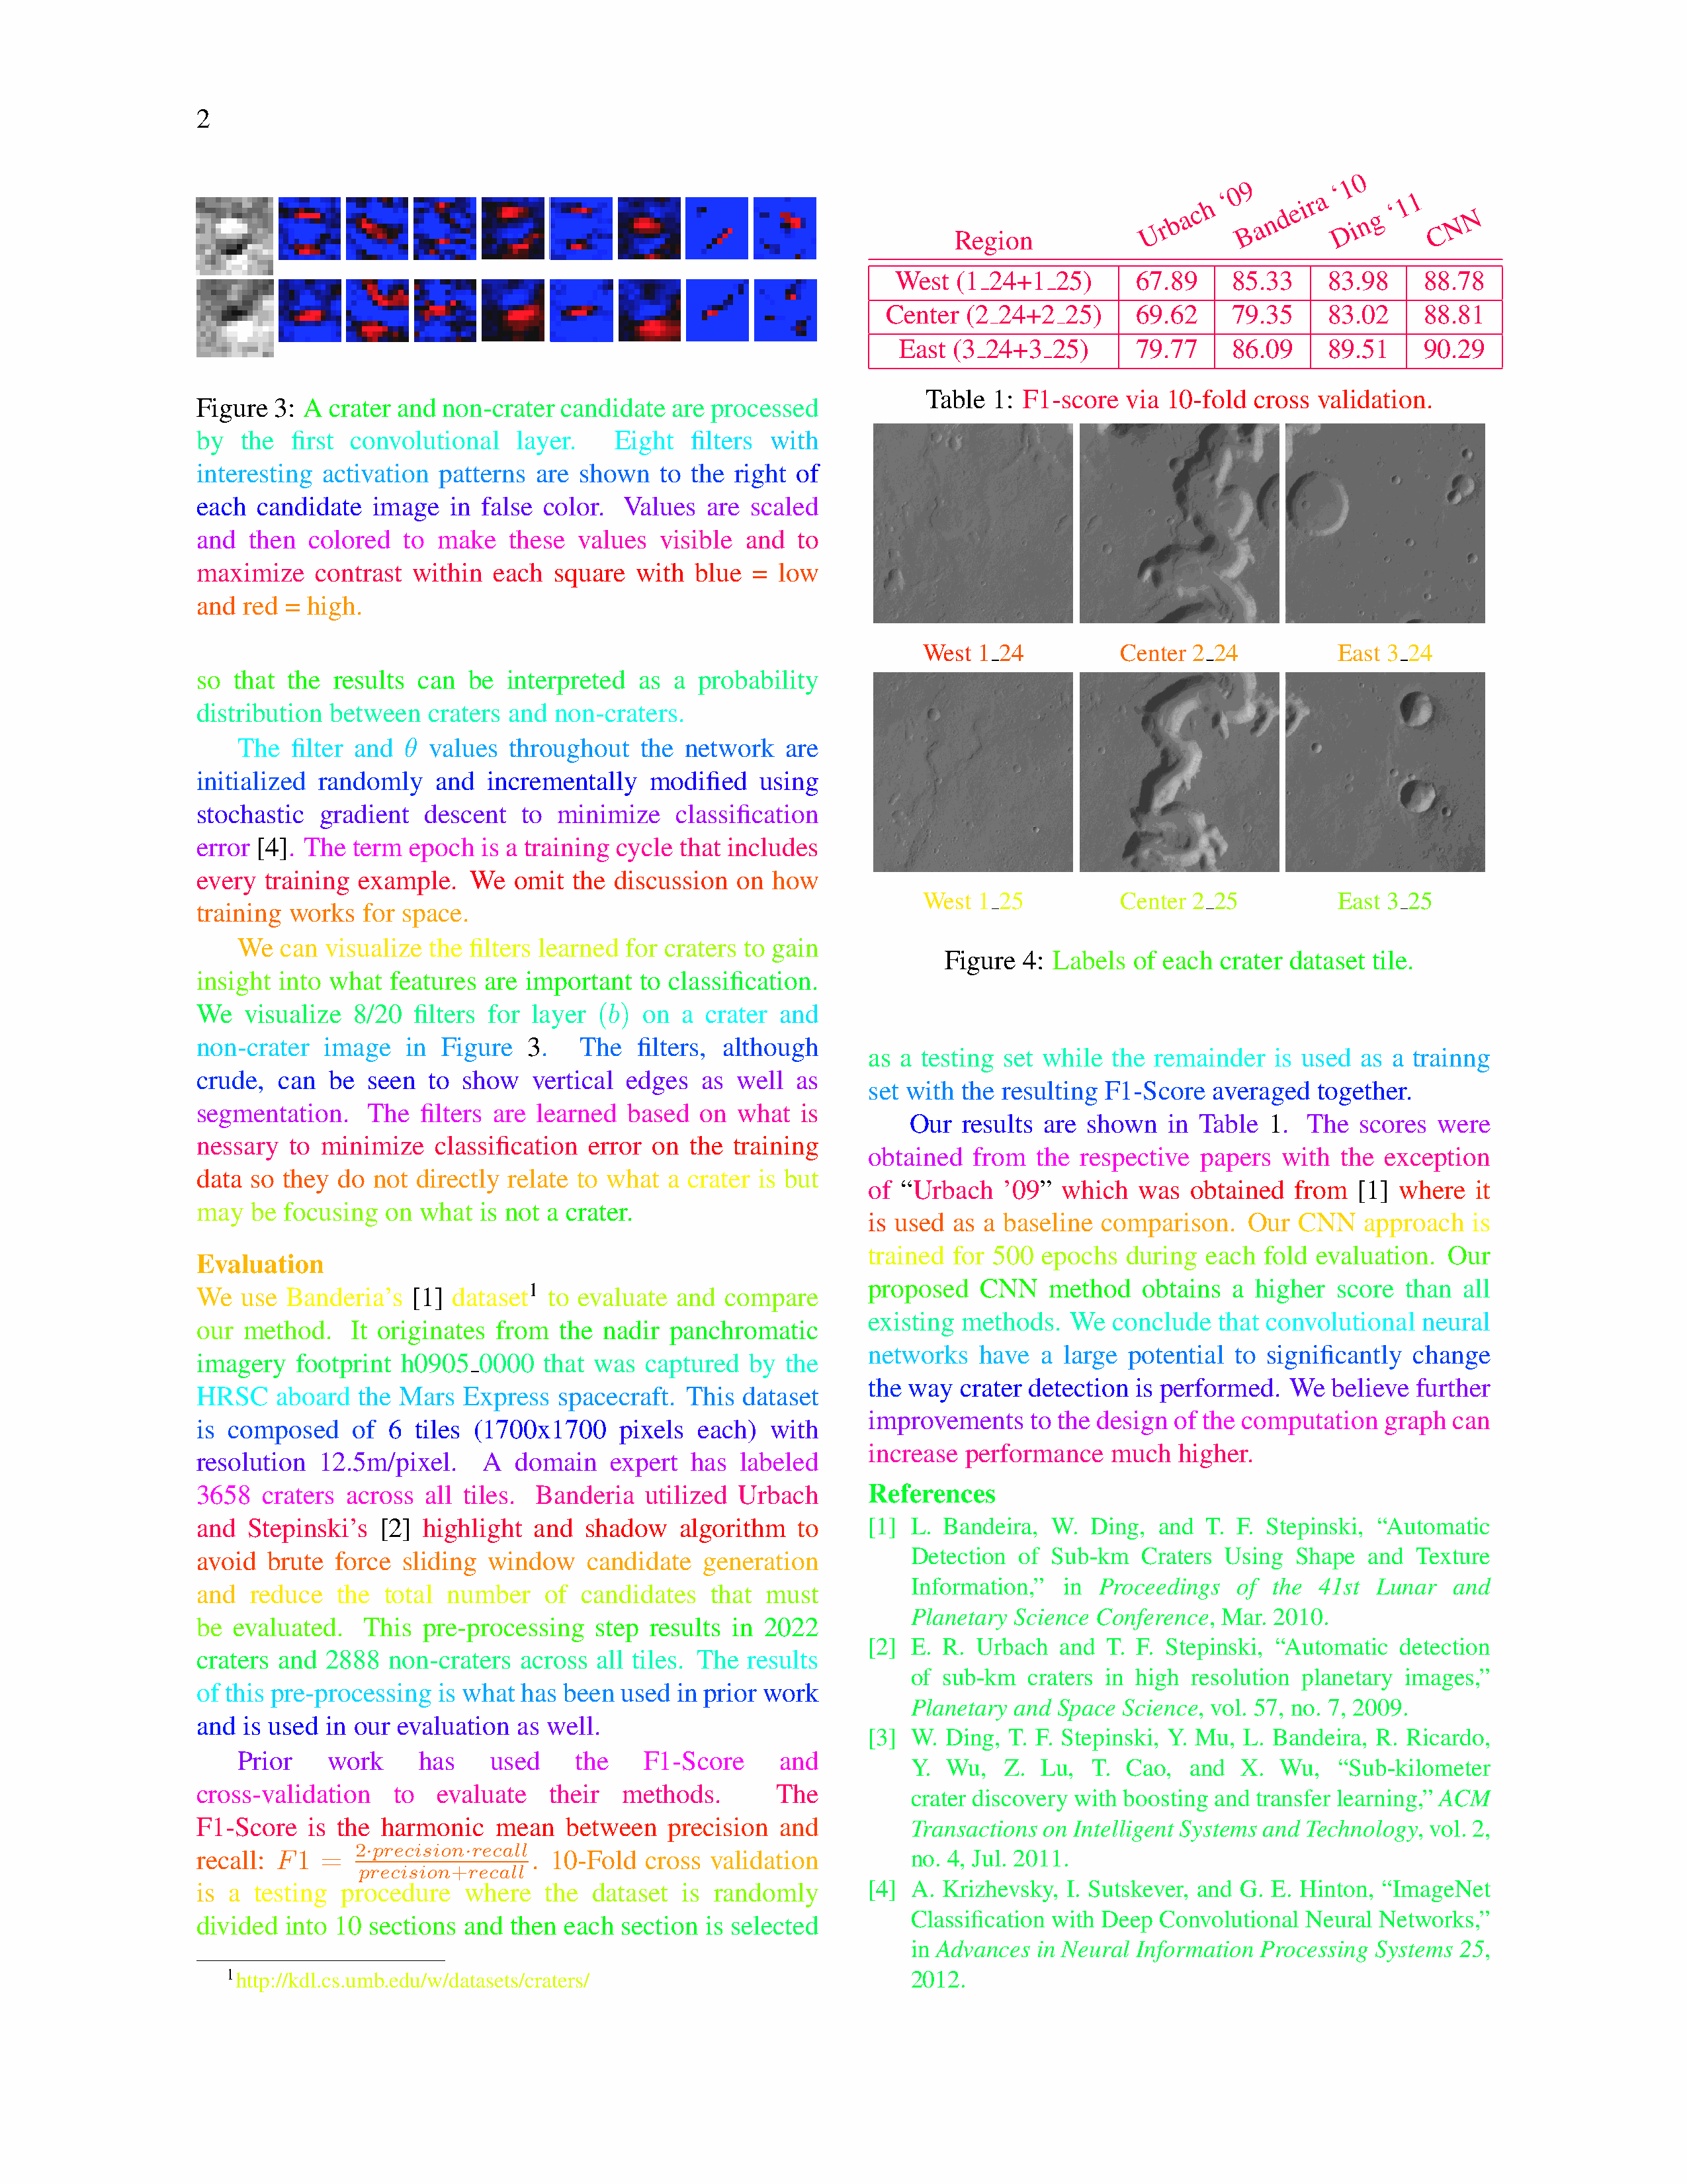

In [3]:
from pathlib import Path
from texannotate.annotate_file import annotate_file

with tempfile.TemporaryDirectory() as td:
    with tarfile.open('downloaded/1601.00978.tar.gz' ,'r:gz') as tar:
        tar.extractall(td)
    tex_file = find_latex_file(Path(basename).stem, basepath=td)
    annotate_file(tex_file, color_dict, latex_context=None, basepath=td)
    postprocess_latex(tex_file)
    #print(p/'outputs'/filename.stem)
    #shutil.make_archive(p/'outputs'/filename.stem, 'zip', td)
    basename, pdf_bytes = compile_pdf_locally(
        sources_dir=td
    ) # compile the unmodified latex firstly
    shapes, tokens = pdf_extract(pdf_bytes)

with pdfplumber.open(pdf_bytes) as doc:
    p0 = doc.pages[1]
    im = p0.to_image(resolution=300)
im

# 5. Export annotations as DataFrame

Here we can see that the first 6 nodes are Table of Contents Nodes.
That is, there are 4 subsections in this paper, and they are all direct children of the title node.
The title is then a child node of the root node of the entire paper.

In [4]:

from pdfextract.export_annotation import export_annotation

df_toc, df = export_annotation(shapes, tokens, color_dict)
df.to_csv('text.csv',sep='\t')
df_toc.to_csv('toc.csv',sep='\t')
df.head(100)

,reading_order,label,block_id,section_id,text,page_no,x0,y0,x1,y1,font,font_size,flags,tex,page_size,line_no
0,0,Title,2,1,Crater,1,71.280000,69.817156,112.697479,84.163356,NimbusRomNo9L-Medi,14.3462,"[serifed, proportional, bold]",Crater,"[792, 612]",0
1,1,Title,2,1,Detection,1,116.284029,69.817156,174.443524,84.163356,NimbusRomNo9L-Medi,14.3462,"[serifed, proportional, bold]",Detection,"[792, 612]",0
2,2,Title,2,1,via,1,178.030074,69.817156,196.364518,84.163356,NimbusRomNo9L-Medi,14.3462,"[serifed, proportional, bold]",via,"[792, 612]",0
3,3,Title,2,1,Convolutional,1,199.951068,69.817156,286.128691,84.163356,NimbusRomNo9L-Medi,14.3462,"[serifed, proportional, bold]",Convolutional,"[792, 612]",0
4,4,Title,2,1,Neural,1,289.715241,69.817156,331.950454,84.163356,NimbusRomNo9L-Medi,14.3462,"[serifed, proportional, bold]",Neural,"[792, 612]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Paragraph,11,2,comes,1,71.280000,231.408322,96.734443,241.370922,NimbusRomNo9L-Regu,9.9626,"[serifed, proportional]",comes,"[792, 612]",13
96,96,Paragraph,11,2,from,1,99.324719,231.408322,118.692013,241.370922,NimbusRomNo9L-Regu,9.9626,"[serifed, proportional]",from,"[792, 612]",13
97,97,Paragraph,11,2,their,1,121.282289,231.408322,139.543735,241.370922,NimbusRomNo9L-Regu,9.9626,"[serifed, proportional]",their,"[792, 612]",13
98,98,Paragraph,11,2,is,1,142.134011,231.408322,148.779065,241.370922,NimbusRomNo9L-Regu,9.9626,"[serifed, proportional]",is,"[792, 612]",13


# 6. Visualization of Annotations

In [5]:
colors = {
    "Abstract":(255, 182, 193), "Author":(0, 0, 139), "Caption":(57, 230, 10),
    "Equation":(255, 0, 0),"Figure":(230, 51, 249),"Footer":(255, 255, 255),
    "List":(46, 33, 109),"Paragraph":(181, 196, 220),"Reference":(81, 142, 32),
    "Section":(24, 14, 248),"Table":(129, 252, 254),"Title":(97, 189, 251)
}

In [6]:
rect.keys()

dict_keys(['x0', 'y0', 'x1', 'y1', 'width', 'height', 'pts', 'linewidth', 'stroke', 'fill', 'evenodd', 'stroking_color', 'non_stroking_color', 'mcid', 'tag', 'object_type', 'page_number', 'path', 'dash', 'top', 'bottom', 'doctop', 'page_size'])

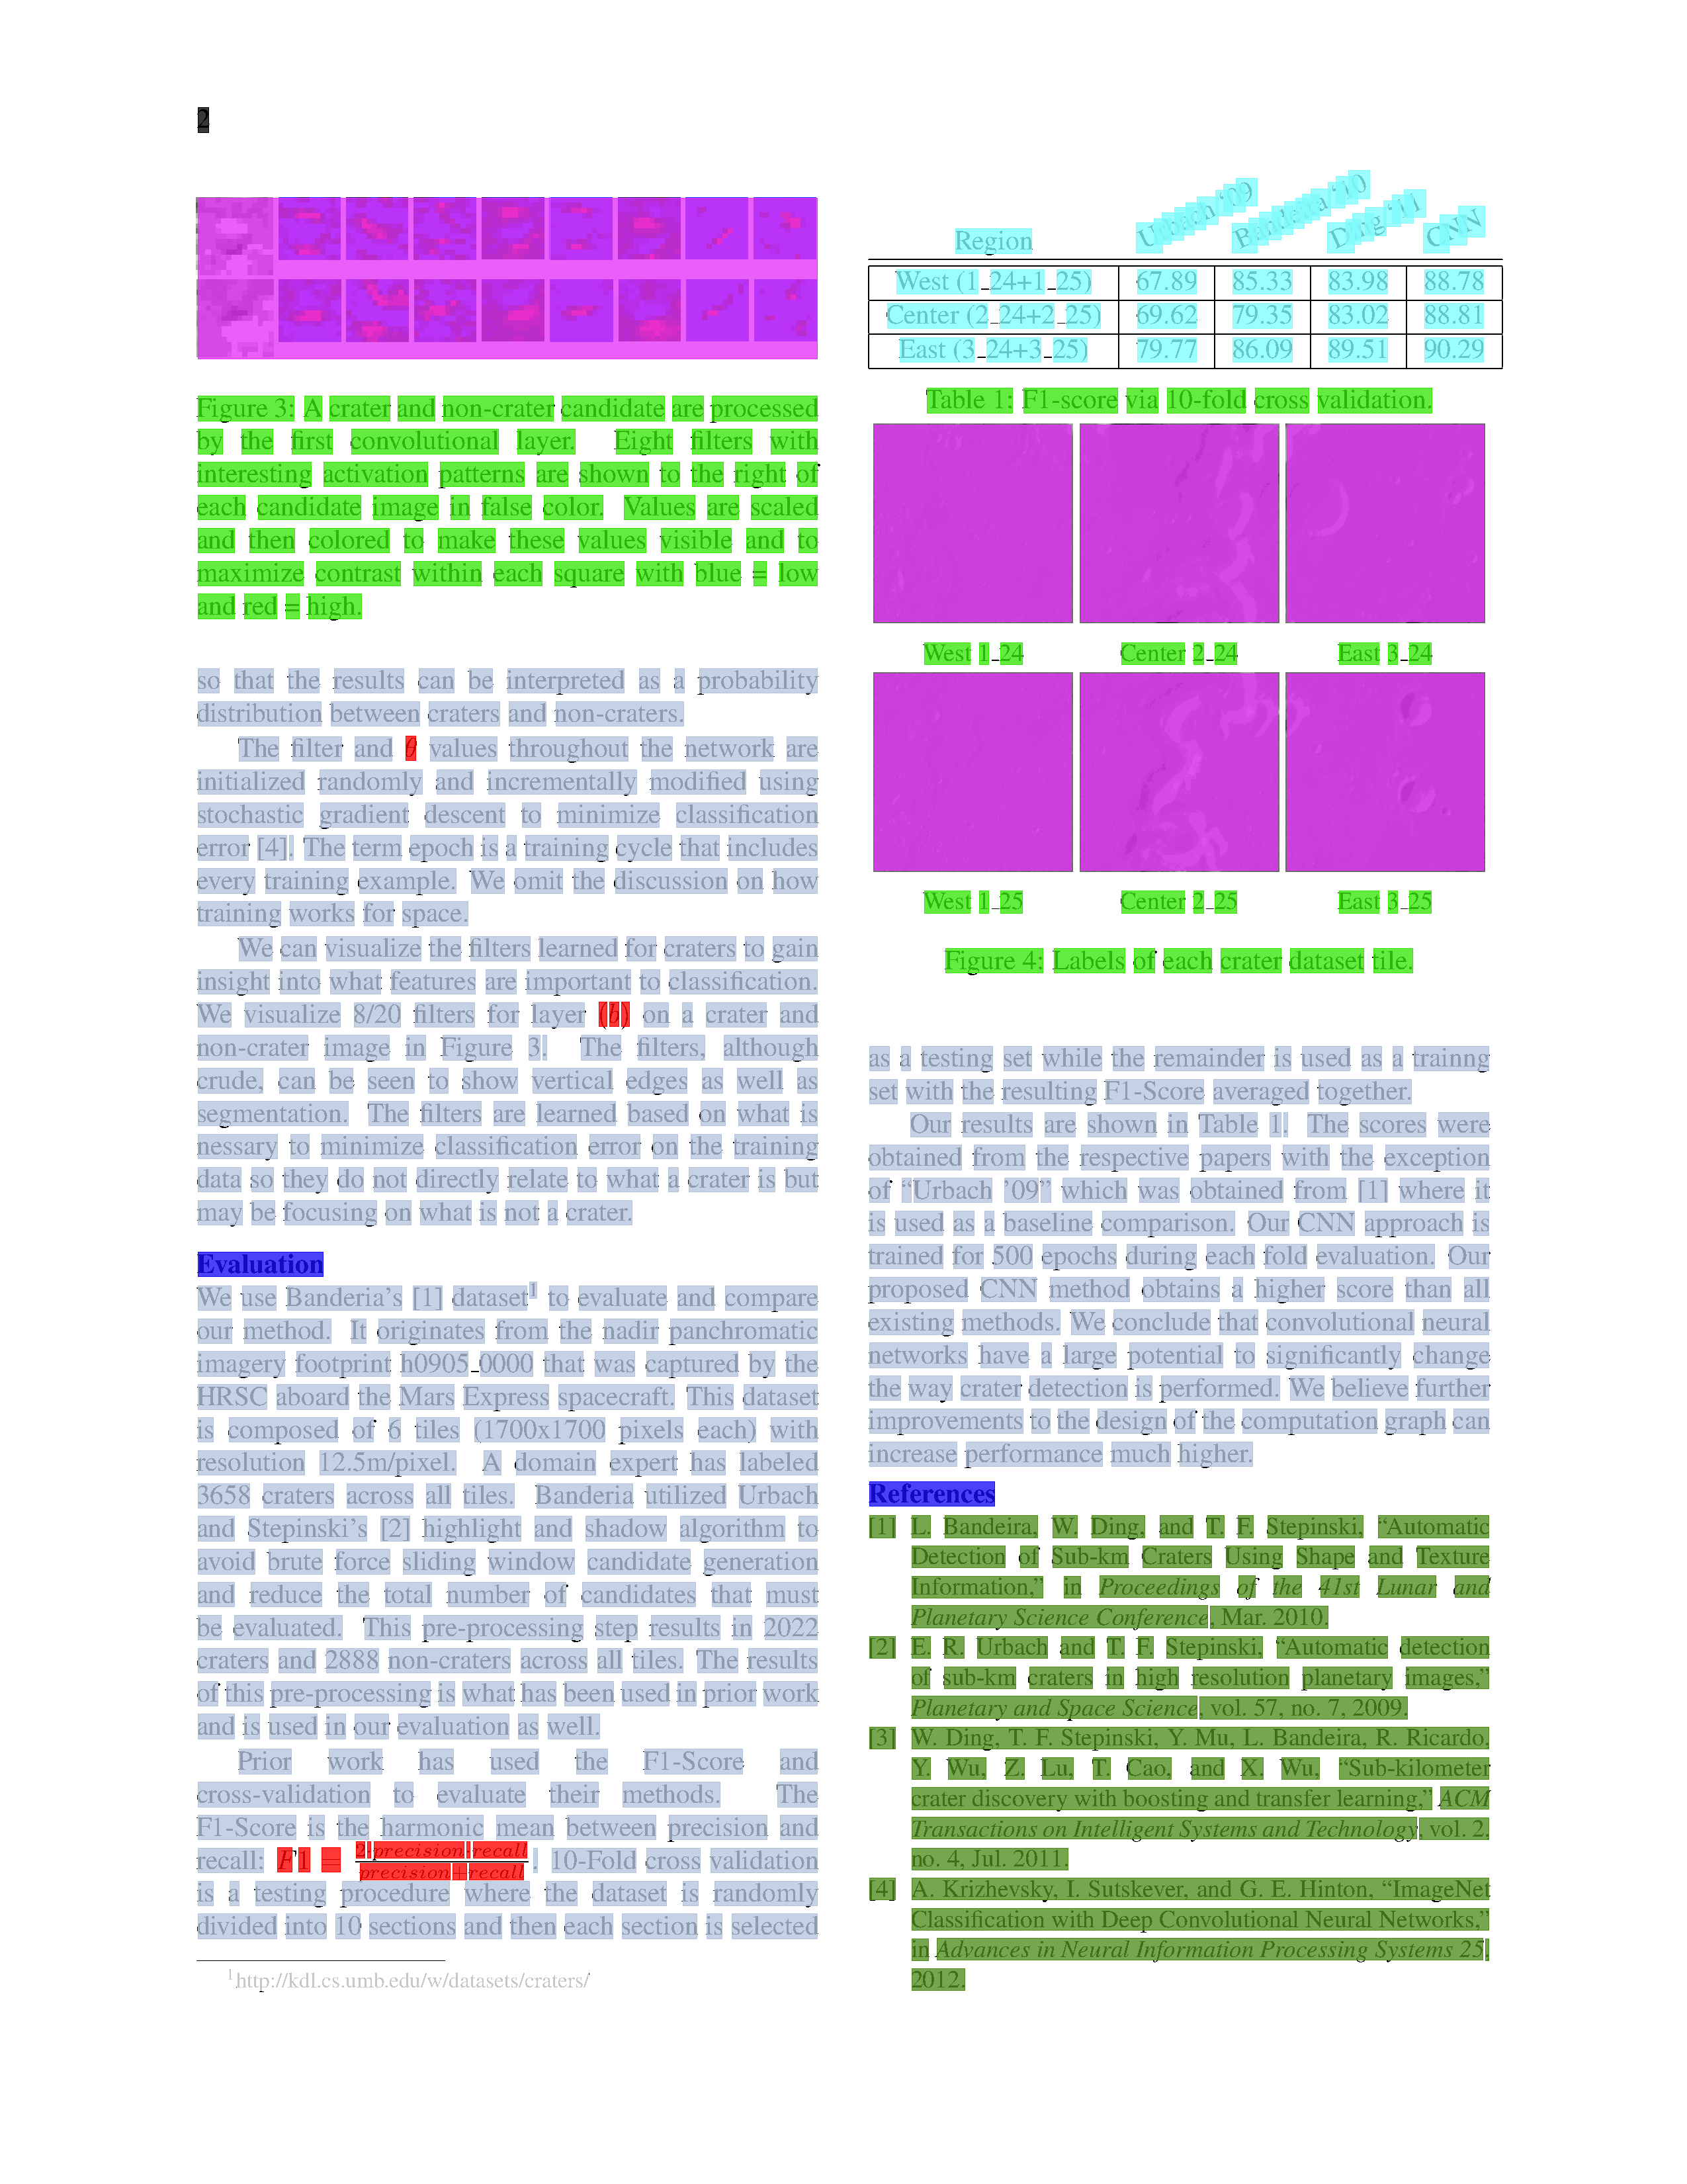

In [7]:
for i, rect in df.iterrows():
    if rect['page_no'] == 2:
        color = colors.get(rect['label'], (0,0,0))
        im_origin.draw_rect((rect['x0'], rect['y0'], rect['x1'], rect['y1']), fill=(color[0],color[1],color[2],200), stroke=color, stroke_width=1)
im_origin